In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Emotion classification.ipynb',
 'Symptom2Disease.csv',
 'Symptoms and Disease nlp model.ipynb',
 'test.txt',
 'train.txt',
 'Untitled.ipynb',
 'val.txt']

In [4]:
df = pd.read_csv('Symptom2Disease.csv')
df

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.label.unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])
df

,label,text,label_num
0,Psoriasis,I have been experiencing a skin rash on my arm...,15
1,Psoriasis,"My skin has been peeling, especially on my kne...",15
2,Psoriasis,I have been experiencing joint pain in my fing...,15
3,Psoriasis,"There is a silver like dusting on my skin, esp...",15
4,Psoriasis,"My nails have small dents or pits in them, and...",15
...,...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...,19
1196,diabetes,"Particularly in the crevices of my skin, I hav...",19
1197,diabetes,I regularly experience these intense urges and...,19
1198,diabetes,"I have trouble breathing, especially outside. ...",19


In [8]:
df.label_num.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

# Text Preprocessing

In [9]:
import spacy
from spacy.lang.en import STOP_WORDS
nlp = spacy.load("en_core_web_lg")

In [10]:
df.text[23]

"I'm having joint discomfort in my fingers, wrists, and knees. The pain is frequently aching and throbbing, and it worsens when I move my joints."

In [11]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [12]:
def preprocess(text):
    list=[]
    for token in nlp(text):
        if token.is_punct or token.is_punct:
            continue
        list.append(token.lemma_.lower())
    list = [token for token in list if not token in STOP_WORDS]
    return ' '.join(list)

In [13]:
preprocess(df.text[23])


'joint discomfort finger wrist knee pain frequently ache throbbing worsen joint'

In [14]:
df['preprocessed'] = df['text'].apply(preprocess)

In [15]:
df.head()

,label,text,label_num,preprocessed
0,Psoriasis,I have been experiencing a skin rash on my arm...,15,experience skin rash arm leg torso past week r...
1,Psoriasis,"My skin has been peeling, especially on my kne...",15,skin peel especially knee elbow scalp peeling ...
2,Psoriasis,I have been experiencing joint pain in my fing...,15,experience joint pain finger wrist knee pain a...
3,Psoriasis,"There is a silver like dusting on my skin, esp...",15,silver like dust skin especially low scalp dus...
4,Psoriasis,"My nails have small dents or pits in them, and...",15,nail small dent pit feel inflammatory tender t...


In [16]:
df['vector'] = df.preprocessed.apply(lambda text: nlp(text).vector)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


a = preprocess(df.text[13])
a = nlp(a).vector
a = a.reshape(-1,1)
scaler1 = MinMaxScaler()
a_scaled = scaler1.fit_transform(a)
a_scaled = a_scaled.reshape(1,-1)

def vector_scaler(x):
    x = x.reshape(-1,1)
    x = scaler.fit_transform(x)
    
    x = x.reshape(1,-1)
    return x[0]


df['scaled_vector'] = df['vector'].apply(vector_scaler)

In [18]:
#df = df.drop(columns=['scaled_vector'])

In [19]:
df.head()

,label,text,label_num,preprocessed,vector
0,Psoriasis,I have been experiencing a skin rash on my arm...,15,experience skin rash arm leg torso past week r...,"[1.2192994, 2.8289015, -2.2025487, 1.1896608, ..."
1,Psoriasis,"My skin has been peeling, especially on my kne...",15,skin peel especially knee elbow scalp peeling ...,"[0.97605723, 0.94874, -1.1472255, 0.7280576, 0..."
2,Psoriasis,I have been experiencing joint pain in my fing...,15,experience joint pain finger wrist knee pain a...,"[2.2577019, 1.5144299, -1.6759292, 1.1042774, ..."
3,Psoriasis,"There is a silver like dusting on my skin, esp...",15,silver like dust skin especially low scalp dus...,"[0.25079936, 0.6398691, -2.6605594, 1.2761254,..."
4,Psoriasis,"My nails have small dents or pits in them, and...",15,nail small dent pit feel inflammatory tender t...,"[0.9336986, 2.1108358, -1.6974756, -0.28041342..."


In [22]:
#df.scaled_vector.values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['vector'].values, df['label_num'], test_size=0.30,random_state=31, stratify=df['label_num'])

In [81]:
np.stack(X_train).shape

(840, 300)

In [82]:
X_train.shape

(840,)

## Scaling Data

In [83]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.fit_transform(X_test_2d)

In [85]:
X_train_2d

array([[ 0.5248093 ,  0.88541573, -1.9757876 , ..., -0.5675956 ,
        -2.077172  ,  0.71562886],
       [ 0.09739667,  0.8820397 , -3.392483  , ...,  3.3744166 ,
        -3.86465   ,  1.4360971 ],
       [ 0.79606783,  1.6717408 , -1.2857136 , ..., -0.5616628 ,
        -0.12039505,  0.7724622 ],
       ...,
       [ 1.4626877 ,  0.62619555, -2.6090608 , ...,  2.5066829 ,
        -2.9071958 ,  1.7713352 ],
       [ 1.3004969 ,  2.1396036 , -2.5377662 , ..., -0.803879  ,
        -1.6257222 ,  0.2903145 ],
       [ 0.6010589 ,  1.779762  , -1.4526945 , ..., -1.9304212 ,
         0.517631  ,  1.1158601 ]], dtype=float32)

## Using Naive Bayesian

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
nbModel = GaussianNB()

In [88]:
nbModel.fit(X_train_scaled,y_train)

GaussianNB()

In [89]:
nbModel.score(X_test_scaled,y_test)

0.6694444444444444

In [90]:
from sklearn.naive_bayes import BernoulliNB

In [91]:
nbModel = BernoulliNB()

In [92]:
nbModel.fit(X_train_scaled,y_train)

BernoulliNB()

In [93]:
nbModel.score(X_test_scaled,y_test)

0.11666666666666667

## Using Support vector Machine

In [94]:
from sklearn.svm import SVC

In [180]:
svModel = SVC(probability=True)

In [181]:
svModel.fit(X_train_2d,y_train)

SVC(probability=True)

In [182]:
svModel.score(X_test_2d,y_test)

0.8805555555555555

In [183]:
text1 = preprocess(df.text[717])
text1 = nlp(text1).vector
svModel.predict([text1])

array([13])

In [184]:
df[df.text == df.text[717]]

,label,text,label_num,preprocessed,vector
717,Migraine,"I have been suffering from acid reflux, indige...",13,suffer acid reflux indigestion frequent headac...,"[0.5704247, -0.05428452, -1.5905492, -0.431310..."


In [275]:
text = "I am been Sneezing, coughing and having headache from last two days"

In [276]:
text1 = preprocess(text)
text1 = nlp(text1).vector
label_num = svModel.predict([text1])[0]
df[df.label_num == label_num].label.unique()[0]

'Typhoid'

## Using Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dtcModel = DecisionTreeClassifier()

In [102]:
dtcModel.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [103]:
dtcModel.score(X_test_scaled,y_test)

0.48055555555555557

In [104]:
X_test_scaled

array([[0.27086753, 0.6119641 , 0.48581034, ..., 0.4236062 , 0.4225692 ,
        0.6496289 ],
       [0.3557761 , 0.62271357, 0.3469906 , ..., 0.4882978 , 0.5621682 ,
        0.27179444],
       [0.86874694, 0.49473852, 0.5714649 , ..., 0.5118594 , 0.74141544,
        0.2286177 ],
       ...,
       [0.5120824 , 0.4977391 , 0.56779075, ..., 0.3682195 , 0.2738088 ,
        0.6095128 ],
       [0.2387518 , 0.6166196 , 0.4909991 , ..., 0.43481377, 0.49910533,
        0.51131916],
       [0.34961414, 0.5484357 , 0.31774354, ..., 0.27728397, 0.41536492,
        0.7825786 ]], dtype=float32)

## SVM Classification Report

In [105]:

from sklearn.metrics import classification_report


In [106]:
y_pred = svModel.predict(X_test_2d)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       0.79      1.00      0.88        15
           3       0.94      1.00      0.97        15
           4       0.65      0.73      0.69        15
           5       0.92      0.73      0.81        15
           6       1.00      0.53      0.70        15
           7       0.94      1.00      0.97        15
           8       1.00      0.93      0.97        15
           9       1.00      0.87      0.93        15
          10       0.82      0.93      0.87        15
          11       1.00      1.00      1.00        15
          12       0.94      1.00      0.97        15
          13       0.94      1.00      0.97        15
          14       1.00      0.80      0.89        15
          15       0.67      0.93      0.78        15
          16       0.74      0.93      0.82        15
          17       1.00    

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

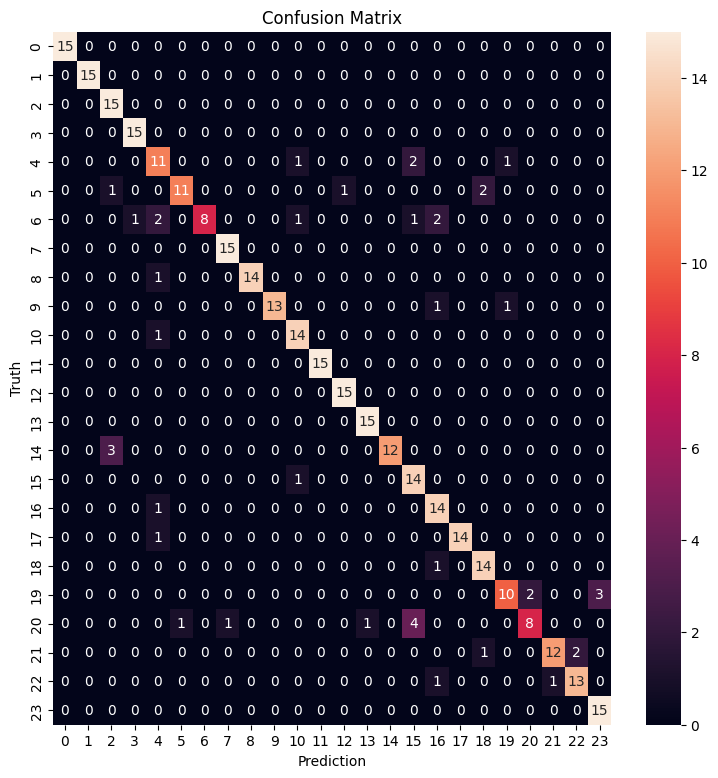

In [109]:

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel("Prediction")
plt.ylabel("Truth");

In [110]:
from sklearn.preprocessing import MinMaxScaler

a = preprocess(df.text[13])
a = nlp(a).vector
a = a.reshape(-1,1)
scaler1 = MinMaxScaler()
a_scaled = scaler1.fit_transform(a)
a_scaled = a_scaled.reshape(1,-1)
a_scaled

array([[0.55782974, 0.6704641 , 0.08574742, 0.39252543, 0.60448545,
        0.3660678 , 0.50808877, 0.94904804, 0.38137504, 0.62067556,
        1.        , 0.56627595, 0.08875862, 0.68651897, 0.66716015,
        0.50128293, 0.7441611 , 0.324407  , 0.36951205, 0.32017845,
        0.30865216, 0.5931581 , 0.32042426, 0.43600288, 0.23662099,
        0.07836321, 0.15893501, 0.42356285, 0.2995183 , 0.6183226 ,
        0.7677636 , 0.5616362 , 0.35706806, 0.36261368, 0.41157904,
        0.27845958, 0.60862374, 0.7443104 , 0.8145786 , 0.5848153 ,
        0.6119736 , 0.2866193 , 0.42627662, 0.6071808 , 0.21715127,
        0.68647504, 0.526626  , 0.06853729, 0.31044763, 0.58224535,
        0.5680909 , 0.527229  , 0.4131654 , 0.08222103, 0.23182939,
        0.50708556, 0.7153176 , 0.69631994, 0.6630562 , 0.53661007,
        0.51047677, 0.36269456, 0.15647751, 0.289419  , 0.4600737 ,
        0.4959714 , 0.05670339, 0.16671392, 0.45498842, 0.761263  ,
        0.5731083 , 0.3304935 , 0.31504643, 0.50

In [111]:
svModel.predict(a_scaled)

array([20])

In [112]:
df[df['label_num']==6].label.unique()

array(['Dengue'], dtype=object)

In [113]:
df[df.text == df.text[13]]

,label,text,label_num,preprocessed,vector
13,Psoriasis,I have experienced difficulty sleeping due to ...,15,experience difficulty sleep itching discomfort...,"[1.1300293, 2.13776, -3.0936525, -0.34893462, ..."


In [114]:
v = X_train[0]
v = v.reshape(-1,1)
v = scaler.fit_transform(v)
v = v.reshape(1,-1)
v

array([[0.5405946 , 0.5923625 , 0.18161392, 0.41233182, 0.6684875 ,
        0.43707186, 0.44118208, 0.82236016, 0.21019018, 0.60521215,
        1.0000001 , 0.6951838 , 0.1066916 , 0.8081729 , 0.910704  ,
        0.4125503 , 0.58681583, 0.24046823, 0.45518965, 0.12159714,
        0.44841334, 0.51513046, 0.30167186, 0.30079305, 0.33356762,
        0.09799117, 0.12889165, 0.2597496 , 0.46154928, 0.52205074,
        0.8361898 , 0.49167612, 0.3459767 , 0.2946236 , 0.40349126,
        0.38024506, 0.42310014, 0.81375265, 0.89416945, 0.5904954 ,
        0.43809438, 0.4250153 , 0.40711454, 0.42507696, 0.29765618,
        0.7074994 , 0.6712717 , 0.0247319 , 0.3660132 , 0.4748631 ,
        0.63359207, 0.57572436, 0.6010866 , 0.12613493, 0.21590872,
        0.5100128 , 0.6229166 , 0.69699687, 0.61367   , 0.543821  ,
        0.5735088 , 0.46775055, 0.28622317, 0.26602143, 0.6826018 ,
        0.5642134 , 0.13444796, 0.25773382, 0.5136364 , 0.8414894 ,
        0.5691195 , 0.33115157, 0.42894167, 0.59

In [115]:
X_train_scaled[0]

array([0.27787346, 0.41356456, 0.5771773 , 0.4038393 , 0.6020669 ,
       0.61908835, 0.27734324, 0.22888473, 0.53435236, 0.42994967,
       0.38757887, 0.5610533 , 0.4582451 , 0.2997224 , 0.6633659 ,
       0.53105193, 0.30493683, 0.5389492 , 0.5053838 , 0.26063675,
       0.62125695, 0.20811033, 0.3378868 , 0.56623375, 0.5839475 ,
       0.5376539 , 0.4681002 , 0.41588834, 0.45923463, 0.16100222,
       0.57720625, 0.51862633, 0.49588415, 0.61186475, 0.4561248 ,
       0.6098987 , 0.20488156, 0.3469058 , 0.5829619 , 0.38944787,
       0.41932642, 0.70312923, 0.2381984 , 0.31904516, 0.43960613,
       0.3090197 , 0.4806147 , 0.43772495, 0.63829696, 0.27252778,
       0.40836275, 0.4897271 , 0.7151739 , 0.4692325 , 0.39167133,
       0.30033466, 0.339976  , 0.5461804 , 0.3065565 , 0.35584778,
       0.5504926 , 0.53560305, 0.6593567 , 0.34448424, 0.68956316,
       0.46418267, 0.41441566, 0.64181566, 0.7499693 , 0.6738227 ,
       0.4544105 , 0.44168884, 0.4380563 , 0.6514311 , 0.62462

# Making a sklearn pipelearn